<a href="https://colab.research.google.com/github/mitrasujoy/LLM/blob/main/Langchain_Pinecone_Indexing_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

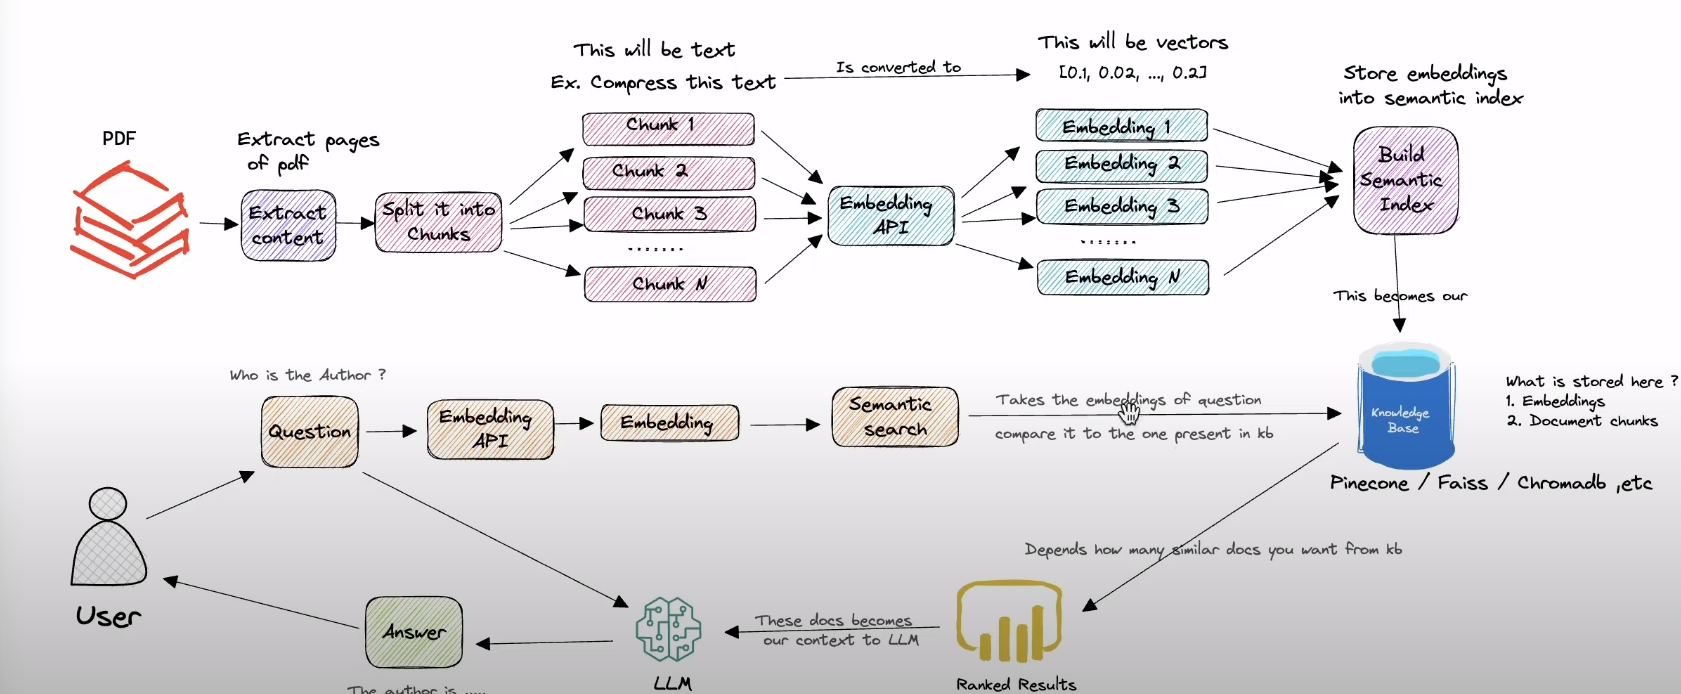

**Install Langchain and OpenAI Dependencies**

In [3]:
!pip install --upgrade langchain openai  -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 934.6/934.6 kB 17.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 57.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.0/90.0 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 20.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 kB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 kB 3.4 MB/s eta 0:00:00


**Install Unstructured Parser Library with all the dependencies**


[Unstructured Open Source Pre processing for Ingestion ](https://www.unstructured.io/)

https://python.langchain.com/en/latest/modules/indexes/document_loaders/examples/unstructured_file.html



---





In [4]:

!pip install unstructured -q
!pip install unstructured[local-inference] -q
!pip install detectron2@git+https://github.com/facebookresearch/detectron2.git@v0.6#egg=detectron2 -q
!pip install layoutparser
!pip install layoutparser[layoutmodels,tesseract]



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 19.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.8/101.8 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 32.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 44.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 45.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.1/238.1 kB 20.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 kB 11.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.9/152.9 kB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.6/69.6 kB 6.1 MB/s eta 0:00:

**Install following dependencies as part of unstructured for detection of following** 

1.poppler-utils (images and PDFs) <BR>
2.tesseract-ocr (images and PDFs) <BR>
3.libmagic-dev  (detection of file types) <BR> 



---



In [5]:
!apt-get install poppler-utils
!apt-get install libmagic-dev 
!apt-get install tesseract-ocr 


Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 34 not upgraded.
Need to get 174 kB of archives.
After this operation, 754 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal-updates/main amd64 poppler-utils amd64 0.86.1-0ubuntu1.1 [174 kB]
Fetched 174 kB in 1s (210 kB/s)
Selecting previously unselected package poppler-utils.
(Reading database ... 122545 files and directories currently installed.)
Preparing to unpack .../poppler-utils_0.86.1-0ubuntu1.1_amd64.deb ...
Unpacking poppler-utils (0.86.1-0ubuntu1.1) ...
Setting up poppler-utils (0.86.1-0ubuntu1.1) ...
Processing triggers for man-db (2.9.1-1) ...
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  libmagic-dev
0 upgraded, 1 newly installed, 0 to re

**Mount the google drive with location of doucuments** 
This assumes that you have uploaded pdf and documents in documents folder in GDrive or else customize as per your needs
<BR>
Verify the number of documents 

In [13]:
from google.colab import drive
drive.mount('/content/drive')

import os
len(os.listdir('/content/drive/MyDrive/documents'))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


2

In [14]:

# Needed for the library to work 
!pip install "pillow<7"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
from langchain.document_loaders import DirectoryLoader


def load_docs(directory):
  loader = DirectoryLoader(directory)
  documents = loader.load()
  return documents

directory = '/content/drive/MyDrive/documents'
documents = load_docs(directory)
len(documents)



2

**Split in to chunks using Recursive Text Splitter**
<BR>
[Text Splitter](https://python.langchain.com/en/latest/modules/indexes/text_splitters/getting_started.html)


---





In [7]:
from langchain.text_splitter import RecursiveCharacterTextSplitter

def split_docs(documents,chunk_size=500,chunk_overlap=20):
  text_splitter = RecursiveCharacterTextSplitter(chunk_size=chunk_size, chunk_overlap=chunk_overlap)
  docs = text_splitter.split_documents(documents)
  return docs

docs = split_docs(documents)
print(len(docs))

95


In [ ]:
print(docs[9].page_content)


Always make the gravy by  rst cooking fresh tomato, garlic, and cardamom down into a bright red pulp. This pulp is then pureed after cooling. Then, the chef adds butter, various spices, and Khoa (dried whole milk).

Vegetarian Indian Dish Option:

Though a lot of traditional Indian food uses meat, there are plenty of Indian vegetarian dishes. You can make your own butter chicken vegetarian by substituting chicken for tofu.


**Use Sentence Transformers Embeddings**
<BR>
[SBERT](https://www.sbert.net/)


In [2]:
!pip install sentence_transformers -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 33.1 MB/s eta 0:00:00


In [15]:
from langchain.embeddings import SentenceTransformerEmbeddings
embeddings = SentenceTransformerEmbeddings(model_name="all-MiniLM-L6-v2")


In [16]:
## Verify the dimension of embedding to create an index in pine cone
query_result = embeddings.embed_query("Sujoy Mitra")
len(query_result)

384

**Install pine cone client and ingest in to pine cone index created with dimension of 384**
<BR>
[Langchain with Pinecone](https://python.langchain.com/en/latest/modules/indexes/vectorstores/examples/pinecone.html)


In [5]:
!pip install pinecone-client -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.2/177.2 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.0/60.0 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 283.7/283.7 kB 18.8 MB/s eta 0:00:00


https://python.langchain.com/en/latest/modules/indexes/vectorstores/examples/pinecone.html

In [9]:
import pinecone 
from langchain.vectorstores import Pinecone
# initialize pinecone
pinecone.init(
    api_key="9b308823-cd4f-4d24-aee0-2969ce88eeac",  # find at app.pinecone.io
    environment="us-central1-gcp"  # next to api key in console
)

index_name = "knowledgemanagement"

index = Pinecone.from_documents(docs, embeddings, index_name=index_name)

**Test for similar documents from Pinecone**

In [12]:
def get_similiar_docs(query,k=1,score=False):
  if score:
    similar_docs = index.similarity_search_with_score(query,k=k)
  else:
    similar_docs = index.similarity_search(query,k=k)
  return similar_docs

query = "What is chicken makhani"
similar_docs = get_similiar_docs(query)
similar_docs


[Document(page_content='5/28/23, 12:53 PM\n\nTop 10 Indian Dishes And Recipes || The Most Popular Indian Food\n\nRead on to learn about the best top 10 Indian food dishes and how you can recreate them for yourself.\n\n1. Chicken Makhani (Butter Chicken)\n\nButter chicken is mouth-watering, tender chicken, cooked in a spiced tomato sauce. It’s traditionally cooked in a tandoor (a cylindrical clay or metal oven), but may be grilled, roasted or pan-fried in less authentic preparations.', metadata={'source': '/content/drive/MyDrive/documents/TopIndianDishes.pdf'})]